In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Dataset Description
Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
df = pd.read_csv("C:/Users/Asus/Desktop/Programming/Machine learning/Datasets/titanic/train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.dropna(subset='Embarked',axis=0,inplace=True)
df.shape

(889, 12)

In [5]:
df = df.drop(['Cabin', 'Ticket'], axis=1)

In [6]:
df['Family_size'] = df['SibSp']+df['Parch']+1
df = df.drop(['SibSp','Parch'],axis=1)

In [7]:
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
df = df.drop('Name', axis=1)
title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Rare",
    "Rev": "Rare",
    "Col": "Rare",
    "Major": "Rare",
    "Mlle": "Miss", # Cleaning up synonyms
    "Ms": "Miss",
    "Mme": "Mrs",
    "Don": "Rare",
    "Lady": "Rare"
}

df['Title'] = df['Title'].map(title_mapping).fillna('Rare')
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Title
0,1,0,3,male,22.0,7.2500,S,2,Mr
1,2,1,1,female,38.0,71.2833,C,2,Mrs
2,3,1,3,female,26.0,7.9250,S,1,Miss
3,4,1,1,female,35.0,53.1000,S,2,Mrs
4,5,0,3,male,35.0,8.0500,S,1,Mr
5,6,0,3,male,NaN,8.4583,Q,1,Mr
6,7,0,1,male,54.0,51.8625,S,1,Mr
7,8,0,3,male,2.0,21.0750,S,5,Master
8,9,1,3,female,27.0,11.1333,S,3,Mrs
9,10,1,2,female,14.0,30.0708,C,2,Mrs


In [8]:
mapper = {'female':1, 'male':0}
df['Sex'] = df['Sex'].map(mapper)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Title
0,1,0,3,0,22.0,7.2500,S,2,Mr
1,2,1,1,1,38.0,71.2833,C,2,Mrs
2,3,1,3,1,26.0,7.9250,S,1,Miss
3,4,1,1,1,35.0,53.1000,S,2,Mrs
4,5,0,3,0,35.0,8.0500,S,1,Mr


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family_size
count,889.000000,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.642093,32.096681,1.906637
std,256.998173,0.486260,0.834700,0.477538,14.492933,49.697504,1.614703
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,0.000000,20.000000,7.895800,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,14.454200,1.000000
75%,668.000000,1.000000,3.000000,1.000000,38.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,512.329200,11.000000


<Axes: xlabel='Fare', ylabel='Count'>

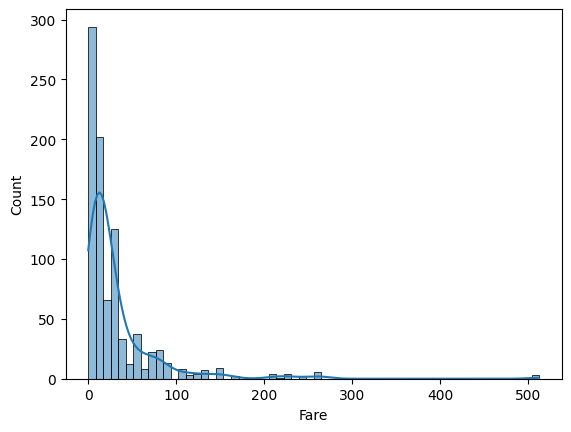

In [11]:
sns.histplot(df['Fare'], kde=True)

In [12]:
X = df.drop(['PassengerId','Survived'],axis=1)
y = df['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 1. Calculate the mean age for each title based ONLY on the training data
title_means = X_train.groupby('Title')['Age'].mean()

# 2. Impute X_train using its own calculated means
X_train['Age'] = X_train['Age'].fillna(X_train['Title'].map(title_means))

# 3. Impute X_test using the MEANS FROM X_TRAIN
# This ensures no information from the test set "leaks" into the model
X_test['Age'] = X_test['Age'].fillna(X_test['Title'].map(title_means))

# Note: If a Title exists in X_test but NOT in X_train, 
# you might want a final fallback to the global mean:
global_mean = X_train['Age'].mean()
X_test['Age'] = X_test['Age'].fillna(global_mean)

In [14]:
X_train = pd.get_dummies(X_train, columns=['Embarked', 'Title'], drop_first=True, dtype=np.int64)
X_test = pd.get_dummies(X_test, columns=['Embarked', 'Title'], drop_first=True, dtype=np.int64)

In [15]:
X_train.head()

,Pclass,Sex,Age,Fare,Family_size,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
708,1,1,22.000000,151.5500,1,0,1,1,0,0,0
240,3,1,22.472477,14.4542,2,0,0,1,0,0,0
382,3,0,32.000000,7.9250,1,0,1,0,1,0,0
792,3,1,22.472477,69.5500,11,0,1,1,0,0,0
683,3,0,14.000000,46.9000,8,0,1,0,1,0,0


In [16]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Family_size', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer

In [18]:
scaler = ColumnTransformer(
    transformers=[
     ('skewed', FunctionTransformer(np.log1p), ['Fare']),
     ('unskewed', StandardScaler(), ['Pclass', 'Age', 'Family_size'])
 ],
                 remainder='passthrough')
scaler.set_output(transform="pandas")

,transformers,"[('skewed', ...), ('unskewed', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False


In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test) # Predicted probabilities
y_predi = model.predict(X_test) # Binarized predictions (threshold 0.5 by default)

## Evaluation

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, log_loss
accuracy_new = accuracy_score(y_test,y_predi)
precision_new = precision_score(y_test,y_predi)
recall_new = recall_score(y_test,y_predi)
binary_cross_entropy_new = log_loss((y_test),(y_pred_proba))
print(accuracy_new,precision_new,recall_new,binary_cross_entropy_new)                          

0.8089887640449438 0.7333333333333333 0.7971014492753623 0.45270102670910445


In [22]:
from sklearn.ensemble import RandomForestClassifier
new_model = RandomForestClassifier()
new_model.fit(X_train, y_train)
y_pred = new_model.predict(X_test)
y_prob = new_model.predict_proba(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
binary_cross_entropy = log_loss((y_test),(y_prob))
print(accuracy,precision,recall,binary_cross_entropy)

0.7921348314606742 0.7051282051282052 0.7971014492753623 1.2559454816347915


In [23]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
prob = xgb.predict_proba(X_test)

accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
binary_cross_entropy = log_loss((y_test),(prob))
print(accuracy,precision,recall,binary_cross_entropy)

0.8033707865168539 0.7428571428571429 0.7536231884057971 0.5769749481487455
